In [1]:
import numpy as np
mean = [20, 20]
cov = [[5, 0], [25, 25]]
np.random.seed(42)
x, y = np.random.multivariate_normal(mean, cov, 1000).T

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: covariance is not positive-semidefinite.
  """


In [2]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

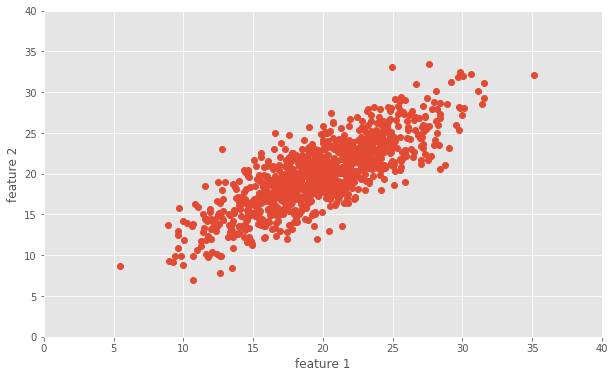

In [3]:
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'o', zorder=1)
plt.axis([0, 40, 0, 40])
plt.xlabel('feature 1')
plt.ylabel('feature 2');

In [4]:
X = np.vstack((x, y)).T

In [5]:
import cv2
mu, eig = cv2.PCACompute(X, np.array([]))
eig

array([[ 0.71481632,  0.69931225],
       [-0.69931225,  0.71481632]])

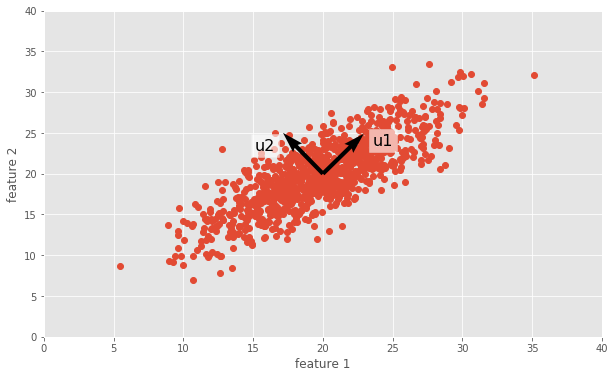

In [6]:
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'o', zorder=1)
plt.quiver(mean[0], mean[1], eig[:, 0], eig[:, 1], zorder=3, scale=0.2, units='xy')
plt.text(mean[0] + 5 * eig[0, 0], mean[1] + 5 * eig[0, 1], 'u1', zorder=5, 
         fontsize=16, bbox=dict(facecolor='white', alpha=0.6))
plt.text(mean[0] + 7 * eig[1, 0], mean[1] + 4 * eig[1, 1], 'u2', zorder=5, 
         fontsize=16, bbox=dict(facecolor='white', alpha=0.6))
plt.axis([0, 40, 0, 40])
plt.xlabel('feature 1')
plt.ylabel('feature 2');

In [7]:
X2 = cv2.PCAProject(X, mu, eig)

[-20, 20, -10, 10]

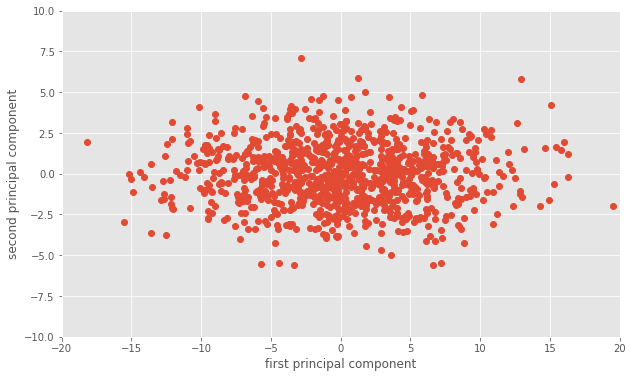

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(X2[:, 0], X2[:, 1], 'o')
plt.xlabel('first principal component')
plt.ylabel('second principal component')
plt.axis([-20, 20, -10, 10])

In [9]:
from sklearn import decomposition

In [10]:
ica = decomposition.FastICA()

In [11]:
X2 = ica.fit_transform(X)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\fastica_.py:118: UserWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '


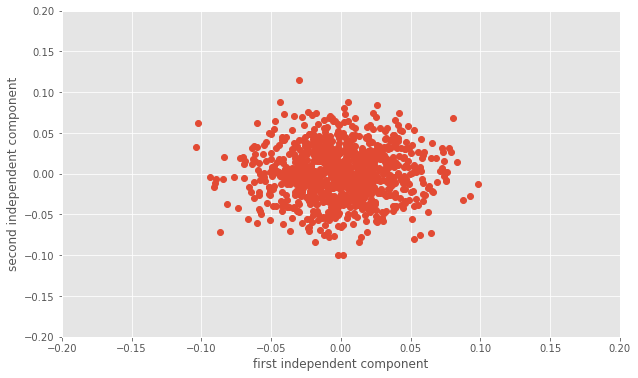

In [12]:
plt.figure(figsize=(10, 6))
plt.plot(X2[:, 0], X2[:, 1], 'o')
plt.xlabel('first independent component')
plt.ylabel('second independent component')
plt.axis([-0.2, 0.2, -0.2, 0.2])
plt.savefig('ica.png')

In [13]:
nmf = decomposition.NMF()

In [14]:
X2 = nmf.fit_transform(X)

[0, 7, 0, 15]

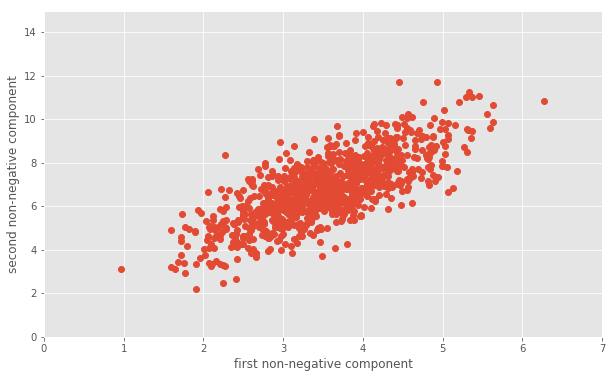

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(X2[:, 0], X2[:, 1], 'o')
plt.xlabel('first non-negative component')
plt.ylabel('second non-negative component')
plt.axis([0, 7, -0, 15])